In [ ]:
import numpy as np
import pandas as pd
from scipy import constants
from scipy import special
import matplotlib.pyplot as plt

In [ ]:
f = 868 * 1000_000
h = 300
pi = constants.pi
C = constants.speed_of_light

In [ ]:
theta = np.linspace(0.1, 90, 10000)
df_theta = pd.DataFrame(theta, columns=["theta"])
df_theta

,theta
0,0.100000
1,0.108991
2,0.117982
3,0.126973
4,0.135964
...,...
9995,89.964036
9996,89.973027
9997,89.982018
9998,89.991009


In [ ]:
d = np.arange(1,101,1)
df_d = pd.DataFrame(d, columns=["d"])
df_d

,d
0,1
1,2
2,3
3,4
4,5
...,...
95,96
96,97
97,98
98,99


In [ ]:
Pt = 0.5
N0 = -174
B = 125 * 1000

In [ ]:
SF = np.arange(7, 13, 1)
df_SF = pd.DataFrame(SF, columns=["SF"])
df_SF

,SF
0,7
1,8
2,9
3,10
4,11
5,12


In [ ]:
eta_700 = [("eta_LOS", 0.0, 0.6, 1.0, 1.5),
          ("eta_NLOS", 18, 17, 20, 29) ]

eta_700_df = pd.DataFrame(eta_700, columns=["Parameter", "Suburban", "Urban", "Dense Urban", "High-Rise Urban"])
eta_700_df.set_index(["Parameter"], inplace=True)
eta_700_df = eta_700_df.T
eta_700_df

Parameter,eta_LOS,eta_NLOS
Suburban,0.0,18.0
Urban,0.6,17.0
Dense Urban,1.0,20.0
High-Rise Urban,1.5,29.0


In [ ]:
eta_2000 = [("eta_LOS", 0.1, 1.0, 1.6, 2.3),
            ("eta_NLOS", 21, 20, 23, 34)]

eta_2000_df = pd.DataFrame(eta_2000, columns=["Parameter", "Suburban", "Urban", "Dense Urban", "High-Rise Urban"])
eta_2000_df.set_index(["Parameter"], inplace=True)
eta_2000_df = eta_2000_df.T
eta_2000_df

Parameter,eta_LOS,eta_NLOS
Suburban,0.1,21.0
Urban,1.0,20.0
Dense Urban,1.6,23.0
High-Rise Urban,2.3,34.0


In [ ]:
a_b = [("a", 5.0310, 9.6238, 11.9582, 27.1157),
          ("b", 0.3528, 0.1598, 0.1365, 0.1232)
          ]

a_b_df = pd.DataFrame(a_b, columns=["index", "Suburban", "Urban", "Dense Urban", "High-Rise Urban"])
a_b_df.set_index(["index"], inplace=True)
a_b_df = a_b_df.T
a_b_df

index,a,b
Suburban,5.0310,0.3528
Urban,9.6238,0.1598
Dense Urban,11.9582,0.1365
High-Rise Urban,27.1157,0.1232


,theta,h,d,a,b,SF,eta_LOS,eta_NLOS,"P(LOS, theta)","P(NLOS, theta)",PL_LOS,PL_NLOS,PL_total,SNR_db,SNR,Q_arg,Pb
count,10000.000000,10000.0,10000.000000,10000.000,1.000000e+04,10000.0,10000.0,10000.0,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.050000,300.0,1355.396880,5.031,3.528000e-01,7.0,0.0,18.0,0.893092,1.069081e-01,86.719047,104.719047,88.643393,37.397807,16741.442505,1652.391512,0.004186
std,25.955788,0.0,5705.162997,0.000,1.110279e-16,0.0,0.0,0.0,0.254992,2.549918e-01,7.644309,7.644309,11.959872,11.959872,12101.246076,877.915412,0.056516
min,0.100000,300.0,300.000000,5.031,3.528000e-01,7.0,0.0,18.0,0.033723,4.816147e-13,80.760603,98.760603,80.760603,-27.274849,0.001873,-2.359843,0.000000
25%,22.575000,300.0,324.659015,5.031,3.528000e-01,7.0,0.0,18.0,0.989788,1.337768e-09,81.446727,99.446727,81.446727,36.780968,4765.372456,996.698889,0.000000
50%,45.050000,300.0,423.894316,5.031,3.528000e-01,7.0,0.0,18.0,0.999996,3.715167e-06,83.763330,101.763330,83.763396,42.277803,16895.861603,1879.384011,0.000000
75%,67.525000,300.0,781.468875,5.031,3.528000e-01,7.0,0.0,18.0,1.000000,1.021224e-02,89.076411,107.076411,89.260232,44.594473,28803.633469,2454.768460,0.000000
max,90.000000,300.0,171887.425806,5.031,3.528000e-01,7.0,0.0,18.0,1.000000,9.662772e-01,135.923060,153.923060,153.316049,45.280597,33733.367734,2656.787858,0.990859


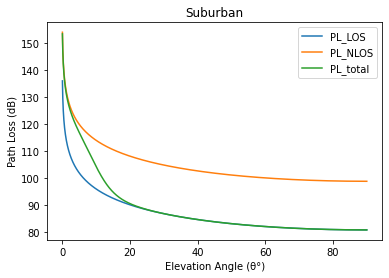

In [ ]:
Suburban_700_sf7 = df_theta.copy()
Suburban_700_sf7["h"] = h
Suburban_700_sf7["d"] = Suburban_700_sf7["h"] / np.sin(Suburban_700_sf7["theta"] * pi / 180)
Suburban_700_sf7["a"] = 5.0310
Suburban_700_sf7["b"] = 0.3528
Suburban_700_sf7["SF"] = 7
Suburban_700_sf7["eta_LOS"] = 0
Suburban_700_sf7["eta_NLOS"] = 18
Suburban_700_sf7["P(LOS, theta)"] = 1 / (1 + (Suburban_700_sf7["a"] * np.exp((-1 * Suburban_700_sf7["b"])* (Suburban_700_sf7["theta"] - Suburban_700_sf7["a"]))))
Suburban_700_sf7["P(NLOS, theta)"] = 1 - Suburban_700_sf7["P(LOS, theta)"]

Suburban_700_sf7["PL_LOS"] = (20 * np.log10(Suburban_700_sf7["d"])) + (20 * np.log10(f)) + (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf7["eta_LOS"])
Suburban_700_sf7["PL_NLOS"] = (20 * np.log10(Suburban_700_sf7["d"])) + (20 * np.log10(f))+ (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf7["eta_NLOS"])

Suburban_700_sf7["PL_total"] = ((Suburban_700_sf7["P(LOS, theta)"]) * (Suburban_700_sf7["PL_LOS"])) + ((Suburban_700_sf7["P(NLOS, theta)"]) * (Suburban_700_sf7["PL_NLOS"]))

Suburban_700_sf7["SNR_db"] = -10 * np.log10(Pt) - Suburban_700_sf7["PL_total"] + 174 - 10 * np.log10(B)
Suburban_700_sf7["SNR"] = np.power(10, (Suburban_700_sf7["SNR_db"]/10))

Suburban_700_sf7["Q_arg"] = 1.28 * np.sqrt(Suburban_700_sf7["SNR"] * np.power(2, Suburban_700_sf7["SF"])) - 1.28 * np.sqrt(Suburban_700_sf7["SF"]) + 0.4
Suburban_700_sf7["Pb"] = 0.5 - 0.5*special.erf(Suburban_700_sf7["Q_arg"]/np.sqrt(2))

Suburban_700_sf7.sort_values("theta", inplace=True)
plt.plot(Suburban_700_sf7["theta"],  Suburban_700_sf7["PL_LOS"], label="PL_LOS")
plt.plot(Suburban_700_sf7["theta"],  Suburban_700_sf7["PL_NLOS"], label="PL_NLOS")
plt.plot(Suburban_700_sf7["theta"],  Suburban_700_sf7["PL_total"], label="PL_total")
plt.xlabel("Elevation Angle (θ°)")
plt.ylabel("Path Loss (dB)")
plt.title("Suburban")
plt.legend()
Suburban_700_sf7.describe()

,theta,h,d,a,b,SF,eta_LOS,eta_NLOS,"P(LOS, theta)","P(NLOS, theta)",PL_LOS,PL_NLOS,PL_total,SNR_db,SNR,Q_arg,Pb
count,10000.000000,10000.0,1.000000e+04,10000.000,1.000000e+04,10000.0,10000.0,10000.0,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04
mean,45.050000,100000.0,4.517990e+05,5.031,3.528000e-01,8.0,0.0,18.0,0.893092,1.069081e-01,137.176622,155.176622,139.100968,-13.059768,1.506730e-01,3.802788,2.064768e-01
std,25.955788,0.0,1.901721e+06,0.000,1.110279e-16,0.0,0.0,0.0,0.254992,2.549918e-01,7.644309,7.644309,11.959872,11.959872,1.089112e-01,3.724680,3.736245e-01
min,0.100000,100000.0,1.000000e+05,5.031,3.528000e-01,8.0,0.0,18.0,0.033723,4.816147e-13,131.218178,149.218178,131.218178,-77.732424,1.685612e-08,-3.217728,3.885781e-16
25%,22.575000,100000.0,1.082197e+05,5.031,3.528000e-01,8.0,0.0,18.0,0.989788,1.337768e-09,131.904302,149.904302,131.904302,-13.676607,4.288835e-02,1.020919,2.860212e-13
50%,45.050000,100000.0,1.412981e+05,5.031,3.528000e-01,8.0,0.0,18.0,0.999996,3.715167e-06,134.220904,152.220904,134.220971,-8.179772,1.520628e-01,4.765835,9.403688e-07
75%,67.525000,100000.0,2.604896e+05,5.031,3.528000e-01,8.0,0.0,18.0,1.000000,1.021224e-02,139.533986,157.533986,139.717807,-5.863102,2.592327e-01,7.206985,1.536464e-01
max,90.000000,100000.0,5.729581e+07,5.031,3.528000e-01,8.0,0.0,18.0,1.000000,9.662772e-01,186.380635,204.380635,203.773624,-5.176978,3.036003e-01,8.064080,9.993539e-01


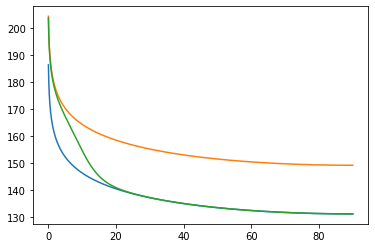

In [ ]:
Suburban_700_sf8 = df_theta.copy()
Suburban_700_sf8["h"] = 100_000
Suburban_700_sf8["d"] = Suburban_700_sf8["h"] / np.sin(Suburban_700_sf8["theta"] * pi / 180)
Suburban_700_sf8["a"] = 5.0310
Suburban_700_sf8["b"] = 0.3528
Suburban_700_sf8["SF"] = 8
Suburban_700_sf8["eta_LOS"] = 0
Suburban_700_sf8["eta_NLOS"] = 18
Suburban_700_sf8["P(LOS, theta)"] = 1 / (1 + (Suburban_700_sf8["a"] * np.exp((-1 * Suburban_700_sf8["b"])* (Suburban_700_sf8["theta"] - Suburban_700_sf8["a"]))))
Suburban_700_sf8["P(NLOS, theta)"] = 1 - Suburban_700_sf8["P(LOS, theta)"]

Suburban_700_sf8["PL_LOS"] = (20 * np.log10(Suburban_700_sf8["d"])) + (20 * np.log10(f)) + (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf8["eta_LOS"])
Suburban_700_sf8["PL_NLOS"] = (20 * np.log10(Suburban_700_sf8["d"])) + (20 * np.log10(f))+ (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf8["eta_NLOS"])

Suburban_700_sf8["PL_total"] = ((Suburban_700_sf8["P(LOS, theta)"]) * (Suburban_700_sf8["PL_LOS"])) + ((Suburban_700_sf8["P(NLOS, theta)"]) * (Suburban_700_sf8["PL_NLOS"]))

Suburban_700_sf8["SNR_db"] = -10 * np.log10(Pt) - Suburban_700_sf8["PL_total"] + 174 - 10 * np.log10(B)
Suburban_700_sf8["SNR"] = np.power(10, (Suburban_700_sf8["SNR_db"]/10))

Suburban_700_sf8["Q_arg"] = 1.28 * np.sqrt(Suburban_700_sf8["SNR"] * np.power(2, Suburban_700_sf8["SF"])) - 1.28 * np.sqrt(Suburban_700_sf8["SF"]) + 0.4
Suburban_700_sf8["Pb"] = 0.5 - 0.5*special.erf(Suburban_700_sf8["Q_arg"]/np.sqrt(2))

Suburban_700_sf8.sort_values("theta", inplace=True)
plt.plot(Suburban_700_sf8["theta"],  Suburban_700_sf8["PL_LOS"])
plt.plot(Suburban_700_sf8["theta"],  Suburban_700_sf8["PL_NLOS"])
plt.plot(Suburban_700_sf8["theta"],  Suburban_700_sf8["PL_total"])
Suburban_700_sf8.describe()

,theta,h,d,a,b,SF,eta_LOS,eta_NLOS,"P(LOS, theta)","P(NLOS, theta)",PL_LOS,PL_NLOS,PL_total,SNR_db,SNR,Q_arg,Pb
count,10000.000000,10000.0,10000.000000,10000.000,1.000000e+04,10000.0,10000.0,10000.0,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.050000,300.0,1355.396880,5.031,3.528000e-01,9.0,0.0,18.0,0.893092,1.069081e-01,86.719047,104.719047,88.643393,37.397807,16741.442505,3307.316147,0.001979
std,25.955788,0.0,5705.162997,0.000,1.110279e-16,0.0,0.0,0.0,0.254992,2.549918e-01,7.644309,7.644309,11.959872,11.959872,12101.246076,1755.830825,0.038526
min,0.100000,300.0,300.000000,5.031,3.528000e-01,9.0,0.0,18.0,0.033723,4.816147e-13,80.760603,98.760603,80.760603,-27.274849,0.001873,-2.186563,0.000000
25%,22.575000,300.0,324.659015,5.031,3.528000e-01,9.0,0.0,18.0,0.989788,1.337768e-09,81.446727,99.446727,81.446727,36.780968,4765.372456,1995.930902,0.000000
50%,45.050000,300.0,423.894316,5.031,3.528000e-01,9.0,0.0,18.0,0.999996,3.715167e-06,83.763330,101.763330,83.763396,42.277803,16895.861603,3761.301146,0.000000
75%,67.525000,300.0,781.468875,5.031,3.528000e-01,9.0,0.0,18.0,1.000000,1.021224e-02,89.076411,107.076411,89.260232,44.594473,28803.633469,4912.070044,0.000000
max,90.000000,300.0,171887.425806,5.031,3.528000e-01,9.0,0.0,18.0,1.000000,9.662772e-01,135.923060,153.923060,153.316049,45.280597,33733.367734,5316.108838,0.985613


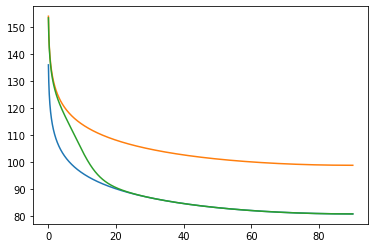

In [ ]:
Suburban_700_sf9 = df_theta.copy()
Suburban_700_sf9["h"] = h
Suburban_700_sf9["d"] = Suburban_700_sf9["h"] / np.sin(Suburban_700_sf9["theta"] * pi / 180)
Suburban_700_sf9["a"] = 5.0310
Suburban_700_sf9["b"] = 0.3528
Suburban_700_sf9["SF"] = 9
Suburban_700_sf9["eta_LOS"] = 0
Suburban_700_sf9["eta_NLOS"] = 18
Suburban_700_sf9["P(LOS, theta)"] = 1 / (1 + (Suburban_700_sf9["a"] * np.exp((-1 * Suburban_700_sf9["b"])* (Suburban_700_sf9["theta"] - Suburban_700_sf9["a"]))))
Suburban_700_sf9["P(NLOS, theta)"] = 1 - Suburban_700_sf9["P(LOS, theta)"]

Suburban_700_sf9["PL_LOS"] = (20 * np.log10(Suburban_700_sf9["d"])) + (20 * np.log10(f)) + (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf9["eta_LOS"])
Suburban_700_sf9["PL_NLOS"] = (20 * np.log10(Suburban_700_sf9["d"])) + (20 * np.log10(f))+ (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf9["eta_NLOS"])

Suburban_700_sf9["PL_total"] = ((Suburban_700_sf9["P(LOS, theta)"]) * (Suburban_700_sf9["PL_LOS"])) + ((Suburban_700_sf9["P(NLOS, theta)"]) * (Suburban_700_sf9["PL_NLOS"]))

Suburban_700_sf9["SNR_db"] = -10 * np.log10(Pt) - Suburban_700_sf9["PL_total"] + 174 - 10 * np.log10(B)
Suburban_700_sf9["SNR"] = np.power(10, (Suburban_700_sf9["SNR_db"]/10))

Suburban_700_sf9["Q_arg"] = 1.28 * np.sqrt(Suburban_700_sf9["SNR"] * np.power(2, Suburban_700_sf9["SF"])) - 1.28 * np.sqrt(Suburban_700_sf9["SF"]) + 0.4
Suburban_700_sf9["Pb"] = 0.5 - 0.5*special.erf(Suburban_700_sf9["Q_arg"]/np.sqrt(2))

Suburban_700_sf9.sort_values("theta", inplace=True)
plt.plot(Suburban_700_sf9["theta"],  Suburban_700_sf9["PL_LOS"])
plt.plot(Suburban_700_sf9["theta"],  Suburban_700_sf9["PL_NLOS"])
plt.plot(Suburban_700_sf9["theta"],  Suburban_700_sf9["PL_total"])
Suburban_700_sf9.describe()

,theta,h,d,a,b,SF,eta_LOS,eta_NLOS,"P(LOS, theta)","P(NLOS, theta)",PL_LOS,PL_NLOS,PL_total,SNR_db,SNR,Q_arg,Pb
count,10000.000000,10000.0,10000.000000,10000.000,1.000000e+04,10000.0,10000.0,10000.0,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.050000,300.0,1355.396880,5.031,3.528000e-01,10.0,0.0,18.0,0.893092,1.069081e-01,86.719047,104.719047,88.643393,37.397807,16741.442505,4678.468529,0.001226
std,25.955788,0.0,5705.162997,0.000,1.110279e-16,0.0,0.0,0.0,0.254992,2.549918e-01,7.644309,7.644309,11.959872,11.959872,12101.246076,2483.119766,0.029647
min,0.100000,300.0,300.000000,5.031,3.528000e-01,10.0,0.0,18.0,0.033723,4.816147e-13,80.760603,98.760603,80.760603,-27.274849,0.001873,-1.875088,0.000000
25%,22.575000,300.0,324.659015,5.031,3.528000e-01,10.0,0.0,18.0,0.989788,1.337768e-09,81.446727,99.446727,81.446727,36.780968,4765.372456,2823.889730,0.000000
50%,45.050000,300.0,423.894316,5.031,3.528000e-01,10.0,0.0,18.0,0.999996,3.715167e-06,83.763330,101.763330,83.763396,42.277803,16895.861603,5320.500272,0.000000
75%,67.525000,300.0,781.468875,5.031,3.528000e-01,10.0,0.0,18.0,1.000000,1.021224e-02,89.076411,107.076411,89.260232,44.594473,28803.633469,6947.933255,0.000000
max,90.000000,300.0,171887.425806,5.031,3.528000e-01,10.0,0.0,18.0,1.000000,9.662772e-01,135.923060,153.923060,153.316049,45.280597,33733.367734,7519.330398,0.969610


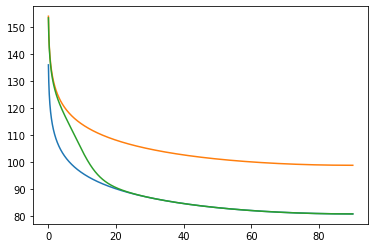

In [ ]:
Suburban_700_sf10 = df_theta.copy()
Suburban_700_sf10["h"] = h
Suburban_700_sf10["d"] = Suburban_700_sf10["h"] / np.sin(Suburban_700_sf10["theta"] * pi / 180)
Suburban_700_sf10["a"] = 5.0310
Suburban_700_sf10["b"] = 0.3528
Suburban_700_sf10["SF"] = 10
Suburban_700_sf10["eta_LOS"] = 0
Suburban_700_sf10["eta_NLOS"] = 18
Suburban_700_sf10["P(LOS, theta)"] = 1 / (1 + (Suburban_700_sf10["a"] * np.exp((-1 * Suburban_700_sf10["b"])* (Suburban_700_sf10["theta"] - Suburban_700_sf10["a"]))))
Suburban_700_sf10["P(NLOS, theta)"] = 1 - Suburban_700_sf10["P(LOS, theta)"]

Suburban_700_sf10["PL_LOS"] = (20 * np.log10(Suburban_700_sf10["d"])) + (20 * np.log10(f)) + (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf10["eta_LOS"])
Suburban_700_sf10["PL_NLOS"] = (20 * np.log10(Suburban_700_sf10["d"])) + (20 * np.log10(f))+ (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf10["eta_NLOS"])

Suburban_700_sf10["PL_total"] = ((Suburban_700_sf10["P(LOS, theta)"]) * (Suburban_700_sf10["PL_LOS"])) + ((Suburban_700_sf10["P(NLOS, theta)"]) * (Suburban_700_sf10["PL_NLOS"]))

Suburban_700_sf10["SNR_db"] = -10 * np.log10(Pt) - Suburban_700_sf10["PL_total"] + 174 - 10 * np.log10(B)
Suburban_700_sf10["SNR"] = np.power(10, (Suburban_700_sf10["SNR_db"]/10))

Suburban_700_sf10["Q_arg"] = 1.28 * np.sqrt(Suburban_700_sf10["SNR"] * np.power(2, Suburban_700_sf10["SF"])) - 1.28 * np.sqrt(Suburban_700_sf10["SF"]) + 0.4
Suburban_700_sf10["Pb"] = 0.5 - 0.5*special.erf(Suburban_700_sf10["Q_arg"]/np.sqrt(2))

Suburban_700_sf10.sort_values("theta", inplace=True)
plt.plot(Suburban_700_sf10["theta"],  Suburban_700_sf10["PL_LOS"])
plt.plot(Suburban_700_sf10["theta"],  Suburban_700_sf10["PL_NLOS"])
plt.plot(Suburban_700_sf10["theta"],  Suburban_700_sf10["PL_total"])
Suburban_700_sf10.describe()

,theta,h,d,a,b,SF,eta_LOS,eta_NLOS,"P(LOS, theta)","P(NLOS, theta)",PL_LOS,PL_NLOS,PL_total,SNR_db,SNR,Q_arg,Pb
count,10000.000000,10000.0,10000.000000,10000.000,1.000000e+04,10000.0,10000.0,10000.0,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.050000,300.0,1355.396880,5.031,3.528000e-01,11.0,0.0,18.0,0.893092,1.069081e-01,86.719047,104.719047,88.643393,37.397807,16741.442505,6617.667013,0.000656
std,25.955788,0.0,5705.162997,0.000,1.110279e-16,0.0,0.0,0.0,0.254992,2.549918e-01,7.644309,7.644309,11.959872,11.959872,12101.246076,3511.661650,0.020492
min,0.100000,300.0,300.000000,5.031,3.528000e-01,11.0,0.0,18.0,0.033723,4.816147e-13,80.760603,98.760603,80.760603,-27.274849,0.001873,-1.338406,0.000000
25%,22.575000,300.0,324.659015,5.031,3.528000e-01,11.0,0.0,18.0,0.989788,1.337768e-09,81.446727,99.446727,81.446727,36.780968,4765.372456,3994.896524,0.000000
50%,45.050000,300.0,423.894316,5.031,3.528000e-01,11.0,0.0,18.0,0.999996,3.715167e-06,83.763330,101.763330,83.763396,42.277803,16895.861603,7525.637012,0.000000
75%,67.525000,300.0,781.468875,5.031,3.528000e-01,11.0,0.0,18.0,1.000000,1.021224e-02,89.076411,107.076411,89.260232,44.594473,28803.633469,9827.174809,0.000000
max,90.000000,300.0,171887.425806,5.031,3.528000e-01,11.0,0.0,18.0,1.000000,9.662772e-01,135.923060,153.923060,153.316049,45.280597,33733.367734,10635.252397,0.909618


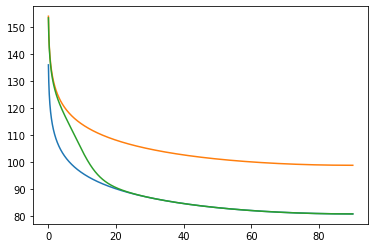

In [ ]:
Suburban_700_sf11 = df_theta.copy()
Suburban_700_sf11["h"] = h
Suburban_700_sf11["d"] = Suburban_700_sf11["h"] / np.sin(Suburban_700_sf11["theta"] * pi / 180)
Suburban_700_sf11["a"] = 5.0310
Suburban_700_sf11["b"] = 0.3528
Suburban_700_sf11["SF"] = 11
Suburban_700_sf11["eta_LOS"] = 0
Suburban_700_sf11["eta_NLOS"] = 18
Suburban_700_sf11["P(LOS, theta)"] = 1 / (1 + (Suburban_700_sf11["a"] * np.exp((-1 * Suburban_700_sf11["b"])* (Suburban_700_sf11["theta"] - Suburban_700_sf11["a"]))))
Suburban_700_sf11["P(NLOS, theta)"] = 1 - Suburban_700_sf11["P(LOS, theta)"]

Suburban_700_sf11["PL_LOS"] = (20 * np.log10(Suburban_700_sf11["d"])) + (20 * np.log10(f)) + (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf11["eta_LOS"])
Suburban_700_sf11["PL_NLOS"] = (20 * np.log10(Suburban_700_sf11["d"])) + (20 * np.log10(f))+ (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf11["eta_NLOS"])

Suburban_700_sf11["PL_total"] = ((Suburban_700_sf11["P(LOS, theta)"]) * (Suburban_700_sf11["PL_LOS"])) + ((Suburban_700_sf11["P(NLOS, theta)"]) * (Suburban_700_sf11["PL_NLOS"]))

Suburban_700_sf11["SNR_db"] = -10 * np.log10(Pt) - Suburban_700_sf11["PL_total"] + 174 - 10 * np.log10(B)
Suburban_700_sf11["SNR"] = np.power(10, (Suburban_700_sf11["SNR_db"]/10))

Suburban_700_sf11["Q_arg"] = 1.28 * np.sqrt(Suburban_700_sf11["SNR"] * np.power(2, Suburban_700_sf11["SF"])) - 1.28 * np.sqrt(Suburban_700_sf11["SF"]) + 0.4
Suburban_700_sf11["Pb"] = 0.5 - 0.5*special.erf(Suburban_700_sf11["Q_arg"]/np.sqrt(2))

Suburban_700_sf11.sort_values("theta", inplace=True)
plt.plot(Suburban_700_sf11["theta"],  Suburban_700_sf11["PL_LOS"])
plt.plot(Suburban_700_sf11["theta"],  Suburban_700_sf11["PL_NLOS"])
plt.plot(Suburban_700_sf11["theta"],  Suburban_700_sf11["PL_total"])
Suburban_700_sf11.describe()

,theta,h,d,a,b,SF,eta_LOS,eta_NLOS,"P(LOS, theta)","P(NLOS, theta)",PL_LOS,PL_NLOS,PL_total,SNR_db,SNR,Q_arg,Pb
count,10000.000000,10000.0,10000.000000,10000.000,1.000000e+04,10000.0,10000.0,10000.0,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.050000,300.0,1355.396880,5.031,3.528000e-01,12.0,0.0,18.0,0.893092,1.069081e-01,86.719047,104.719047,88.643393,37.397807,16741.442505,9360.198438,0.000251
std,25.955788,0.0,5705.162997,0.000,1.110279e-16,0.0,0.0,0.0,0.254992,2.549918e-01,7.644309,7.644309,11.959872,11.959872,12101.246076,4966.239531,0.010776
min,0.100000,300.0,300.000000,5.031,3.528000e-01,12.0,0.0,18.0,0.033723,4.816147e-13,80.760603,98.760603,80.760603,-27.274849,0.001873,-0.488795,0.000000
25%,22.575000,300.0,324.659015,5.031,3.528000e-01,12.0,0.0,18.0,0.989788,1.337768e-09,81.446727,99.446727,81.446727,36.780968,4765.372456,5651.040841,0.000000
50%,45.050000,300.0,423.894316,5.031,3.528000e-01,12.0,0.0,18.0,0.999996,3.715167e-06,83.763330,101.763330,83.763396,42.277803,16895.861603,10644.261924,0.000000
75%,67.525000,300.0,781.468875,5.031,3.528000e-01,12.0,0.0,18.0,1.000000,1.021224e-02,89.076411,107.076411,89.260232,44.594473,28803.633469,13899.127891,0.000000
max,90.000000,300.0,171887.425806,5.031,3.528000e-01,12.0,0.0,18.0,1.000000,9.662772e-01,135.923060,153.923060,153.316049,45.280597,33733.367734,15041.922176,0.687507


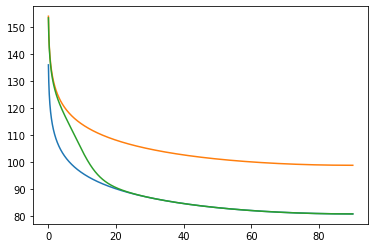

In [ ]:
Suburban_700_sf12 = df_theta.copy()
Suburban_700_sf12["h"] = h
Suburban_700_sf12["d"] = Suburban_700_sf12["h"] / np.sin(Suburban_700_sf12["theta"] * pi / 180)
Suburban_700_sf12["a"] = 5.0310
Suburban_700_sf12["b"] = 0.3528
Suburban_700_sf12["SF"] = 12
Suburban_700_sf12["eta_LOS"] = 0
Suburban_700_sf12["eta_NLOS"] = 18
Suburban_700_sf12["P(LOS, theta)"] = 1 / (1 + (Suburban_700_sf12["a"] * np.exp((-1 * Suburban_700_sf12["b"])* (Suburban_700_sf12["theta"] - Suburban_700_sf12["a"]))))
Suburban_700_sf12["P(NLOS, theta)"] = 1 - Suburban_700_sf12["P(LOS, theta)"]

Suburban_700_sf12["PL_LOS"] = (20 * np.log10(Suburban_700_sf12["d"])) + (20 * np.log10(f)) + (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf12["eta_LOS"])
Suburban_700_sf12["PL_NLOS"] = (20 * np.log10(Suburban_700_sf12["d"])) + (20 * np.log10(f))+ (20 * np.log10((4 * pi) / C))   + (Suburban_700_sf12["eta_NLOS"])

Suburban_700_sf12["PL_total"] = ((Suburban_700_sf12["P(LOS, theta)"]) * (Suburban_700_sf12["PL_LOS"])) + ((Suburban_700_sf12["P(NLOS, theta)"]) * (Suburban_700_sf12["PL_NLOS"]))

Suburban_700_sf12["SNR_db"] = -10 * np.log10(Pt) - Suburban_700_sf12["PL_total"] + 174 - 10 * np.log10(B)
Suburban_700_sf12["SNR"] = np.power(10, (Suburban_700_sf12["SNR_db"]/10))

Suburban_700_sf12["Q_arg"] = 1.28 * np.sqrt(Suburban_700_sf12["SNR"] * np.power(2, Suburban_700_sf12["SF"])) - 1.28 * np.sqrt(Suburban_700_sf12["SF"]) + 0.4
Suburban_700_sf12["Pb"] = 0.5 - 0.5*special.erf(Suburban_700_sf12["Q_arg"]/np.sqrt(2))

Suburban_700_sf12.sort_values("theta", inplace=True)
plt.plot(Suburban_700_sf12["theta"],  Suburban_700_sf12["PL_LOS"])
plt.plot(Suburban_700_sf12["theta"],  Suburban_700_sf12["PL_NLOS"])
plt.plot(Suburban_700_sf12["theta"],  Suburban_700_sf12["PL_total"])
Suburban_700_sf12.describe()

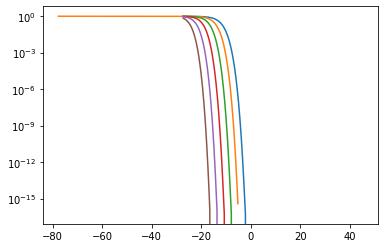

In [ ]:
plt.semilogy(Suburban_700_sf7["SNR_db"],  Suburban_700_sf7["Pb"])
plt.semilogy(Suburban_700_sf8["SNR_db"],  Suburban_700_sf8["Pb"])
plt.semilogy(Suburban_700_sf9["SNR_db"],  Suburban_700_sf9["Pb"])
plt.semilogy(Suburban_700_sf10["SNR_db"],  Suburban_700_sf10["Pb"])
plt.semilogy(Suburban_700_sf11["SNR_db"],  Suburban_700_sf11["Pb"])
plt.semilogy(Suburban_700_sf12["SNR_db"],  Suburban_700_sf12["Pb"])

In [ ]:
Suburban_700_sf7_plt = Suburban_700_sf7[(Suburban_700_sf7["Pb"] > 10e-6) & (Suburban_700_sf7["SNR_db"] > -26)]
Suburban_700_sf8_plt = Suburban_700_sf8[(Suburban_700_sf8["Pb"] > 10e-6) & (Suburban_700_sf8["SNR_db"] > -26)]
Suburban_700_sf9_plt = Suburban_700_sf9[(Suburban_700_sf9["Pb"] > 10e-6) & (Suburban_700_sf9["SNR_db"] > -26)]
Suburban_700_sf10_plt = Suburban_700_sf10[(Suburban_700_sf10["Pb"] > 10e-6) & (Suburban_700_sf10["SNR_db"] > -26)]
Suburban_700_sf11_plt = Suburban_700_sf11[(Suburban_700_sf11["Pb"] > 10e-6) & (Suburban_700_sf11["SNR_db"] > -26)]
Suburban_700_sf12_plt = Suburban_700_sf12[(Suburban_700_sf12["Pb"] > 10e-6) & (Suburban_700_sf12["SNR_db"] > -26)]

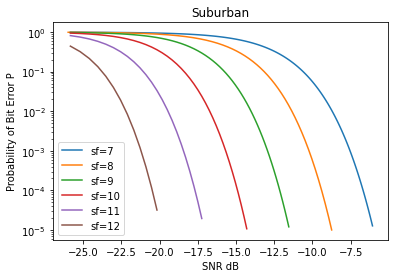

In [ ]:
plt.semilogy(Suburban_700_sf7_plt["SNR_db"],  Suburban_700_sf7_plt["Pb"] , label='sf=7')
plt.semilogy(Suburban_700_sf8_plt["SNR_db"],  Suburban_700_sf8_plt["Pb"], label='sf=8')
plt.semilogy(Suburban_700_sf9_plt["SNR_db"],  Suburban_700_sf9_plt["Pb"], label='sf=9')
plt.semilogy(Suburban_700_sf10_plt["SNR_db"],  Suburban_700_sf10_plt["Pb"], label='sf=10')
plt.semilogy(Suburban_700_sf11_plt["SNR_db"],  Suburban_700_sf11_plt["Pb"], label='sf=11')
plt.semilogy(Suburban_700_sf12_plt["SNR_db"],  Suburban_700_sf12_plt["Pb"], label='sf=12')
plt.xlabel("SNR dB")
plt.ylabel("Probability of Bit Error P")
plt.title("Suburban")
plt.legend()